# 1. 백본 네트워크 구조 상세분석

****************************

- ResNet 논문은 Residual Block 이라는 아주 간단하면서도 획기적인 개념을 도입 => 딥러닝 모델의 레이어가 깊어져도 안정적으로 학습, 모델 성능 개선까지 가능.

`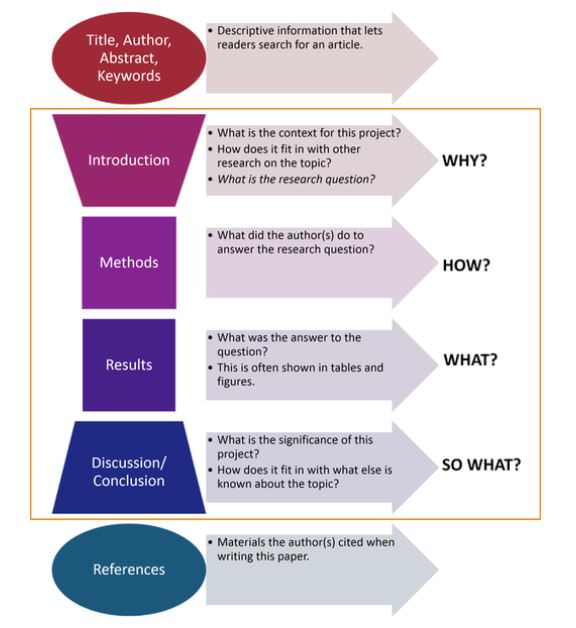

> 논리 구조
> 1. 이전까지의 연구가 해결하지 못했던 문제의식
> 2. 이 문제를 해결하기 위한 그동안의 다른 시도들
> 3. 이 문제에 대한 이 논문만의 독창적인 시도
> 4. 그러한 시도가 가져온 차별화된 성과

- 문제의식

> Degradation Problem => 레이어를 깊이 쌓았을 때 모델이 수렴하고 있음에도 불구하고 발생하는 문제. training/test error가 더 커지는 현상은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문.

> Vanishing/Exploding Gradient문제의 해결책 => normalized initialization, intermediate normalization layers



- ResNet 논문이 제시한 솔루션 : Residual Block

**=> 레이어의 입력값을 활용하여 레이어가 "residual function"(잔차 함수)을 학습하도록 한다.** 원본 입력을 제외한 잔차(residual)함수를 학습하기 때문에 네트워크가 ResNet이라는 이름을 가지게 되었다.

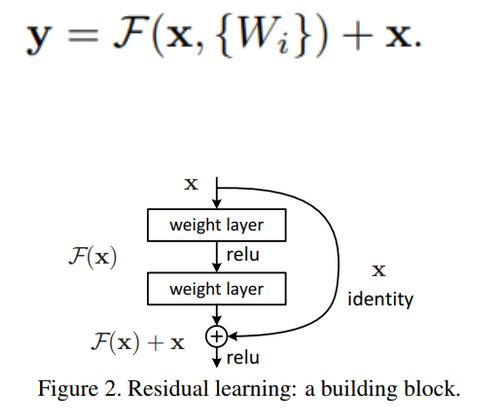

- 학습해야 할 레이어 H(x)를 F(x) + x로 만들면??? F(x)가 Vanishing Gradient현상으로 학습이 안되어도 H(x)는 학습이 될 것이다.
- 실제로 학습해야 할 F(x)는 학습해야 할 레이어 H(x)에 입력값 x를 뺀 형태, => 잔차(Residual)함수가 됨.

https://arxiv.org/pdf/1512.03385.pdf

- shortcut connection의 유무와 네트워크 깊이에 따라 경우를 나누어 모델을 구현.
- 18개 층과 34개 층, 각각 shrotcut이 없는 일반 네트워크와 shortcut이 있는 ResNet 두 가지로 구현 총 4가지

***********************
- DenseNet은 ResNet의 shortcut connection을 마치 Fully Connected Layer 처럼 촘촘히 가지도록 하면 더욱 성능 개선 효과가 크다.
## 1) Dense Connectivity

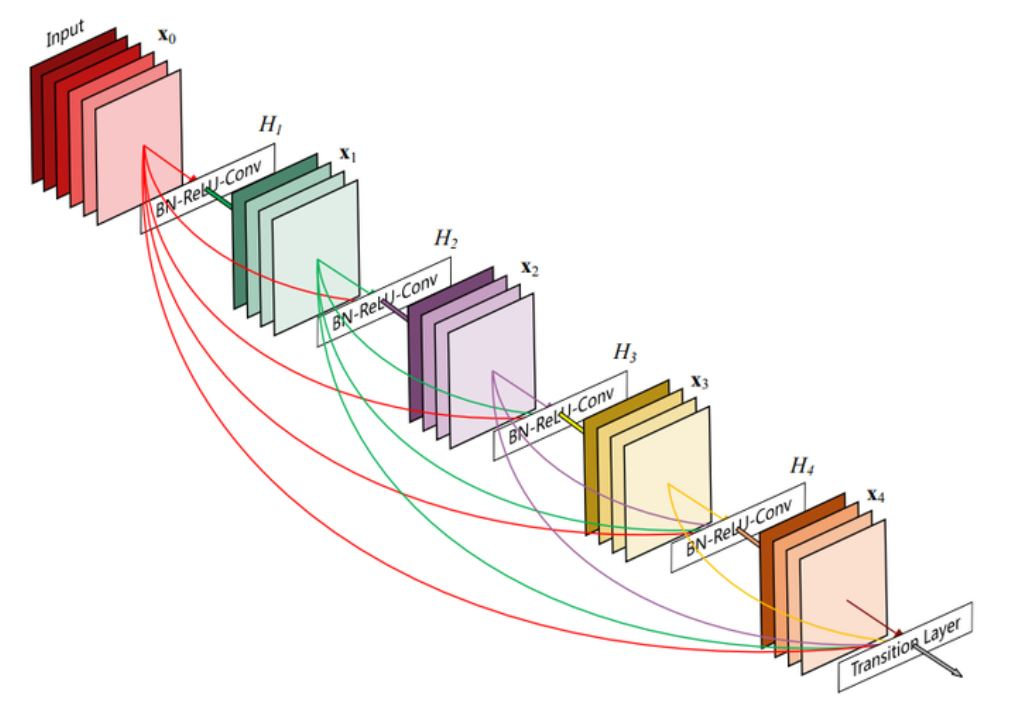

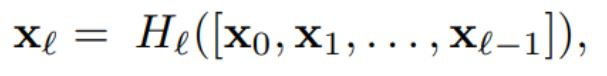

- DenseNet의 기본 블록은 L개의 레이어가 있을 때 레이어 간 L(L+1)/2개의 직접적인 연결을 만듭니다. => 이러한 연결 구조를 **"dense connectivity"라고 Hl로 표기. 합성함수(composite function)

- ResNet은 shortcut을 원소별로 더해주었고, DenseNet은 하나하나를 차원으로 쌓아서 하나의 텐서로 만들어 냄.

- 합성함수 Hl은 이 텐서에 대해 배치 정규화, ReLU 활성화 함수, 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행.

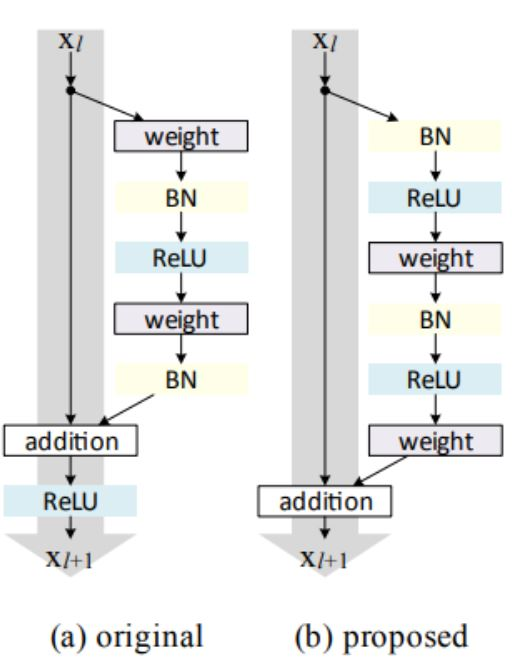

- Pre-activation 개념은 위 그림 (b)에서 ReLU가 컨볼루션 블록 안으로 들어간 것을 의미

- 4 채널의 DenseNet => 두 번째 레이어 = 8, 세 번째 레이어 = 12, 네 번째 레이어 = 16개 특성 맵을 입력 받음

**특성 맵의 크기가 커지는 것을 제한하기 위해서 growth rate이라는 값을 조정하여 채널 개수 조절**

https://hoya012.github.io/blog/DenseNet-Tutorial-1/

***********************
## SENet

- 1) Squeeze
**특성에서 중요한 정보를 짜내는 과정**

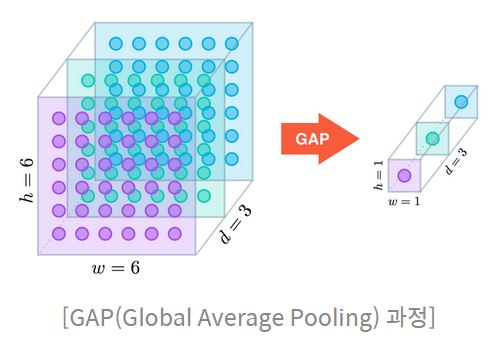

- 채널별 정보를 압축해야 한다. => **pooling 기법 사용**

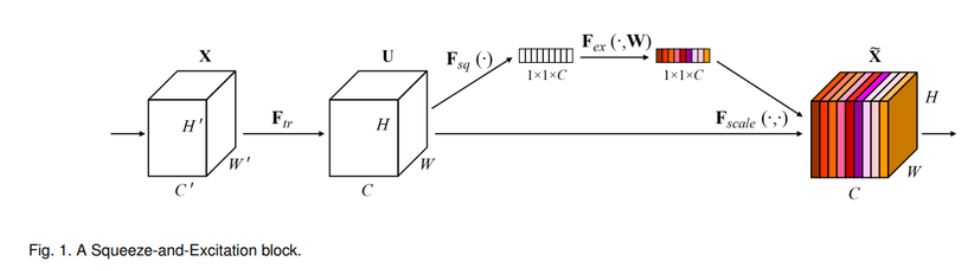

- 2) Excitate
**채널별 정보에 따라 어떤 채널을 강조해야 할지 판단**


https://arxiv.org/pdf/1709.01507.pdf

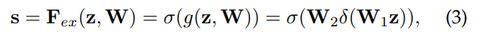

- z는 위에서 global everage pooling을 적용한 특성, 즉 "squeeze"활동의 결과물
- 특성에 W1을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 δ를 거칩니다.
- 두 번째 W2를 곱해주는 linear layer를 거치고 마지막으로 시그모이드 활성화 함수 σ을 거칩니다.
=> 시그모이드를 사용하는 이유는 가장 중요한 하나의 채널만 활성화되는 것이 아닌, 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함.
**하나뿐인 단순 분류 모델의 활성화 함수로는 소프트맥스(SoftMax)를 사용해서 단 하나의 최댓값을 찾지만, 하나의 대상에도 여러 개의 클래스의 정답 라벨을 지정할 수 있는 다중 라벨 분류(multi label classification)에서는 시그모이드를 사용**

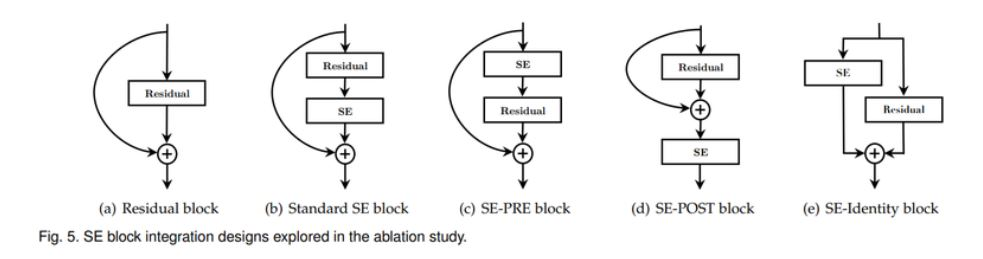

## 1-6 모델 최적화하기(1) Neural Architecture Search

- 모델 구조 자체도 최적화할 수는  없을지 생각 => 여러 가지 네트워크 구조를 탐색하는 것을 아키텍쳐 탐색이라고 한다.
- 그 중 신경망을 사용해 모델의 구조를 탐색하는 접근 방법을 NAS(neural architecture search)

### 1) NASNet

> 원문 - https://arxiv.org/abs/1707.07012

> AI 논문 리뷰 -  http://solarisailab.com/archives/2691

- 일반적으로 머신러닝에서는 그리드 탐색(grid search)등으로 실험과 모델 셋팅(config)를 비교하기 위한 자동화된 방법을 사용하곤 한다. 그리드 탐색은 모든 조합을 실험해보는 것.

### 2) Convolution cell



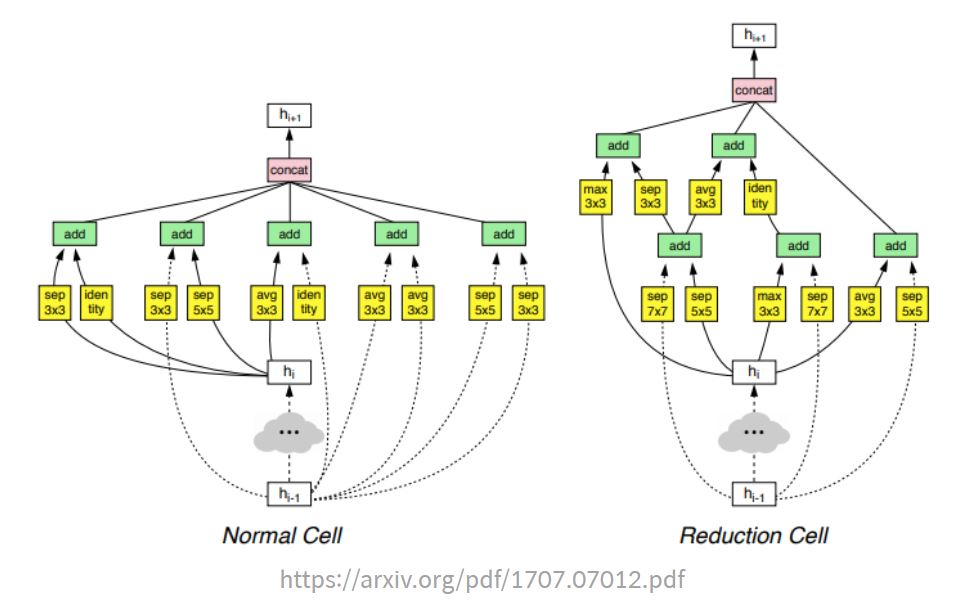

- 레이어 하나마다의 하이퍼 파라미터를 조절한다면 시간이 오래 걸리고 => 최적의 포인트를 찾는 데 **탐색 공간을 줄이기 위해 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식**

- Convolution cell은 normal cell과 reduction cell로 구분.
    - Normal cell은 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정.
    - Reduction cell은 stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록.

- 두 가지 cell을 조합해 만든 것이 최종 결과 네트워크(NASNet)를 만들었고, 좀 더 적은 연산과 가중치로 SOTA(state-of-the-art) 성능 기록

## 1-7 모델 최적화하기(2) EfficientNet

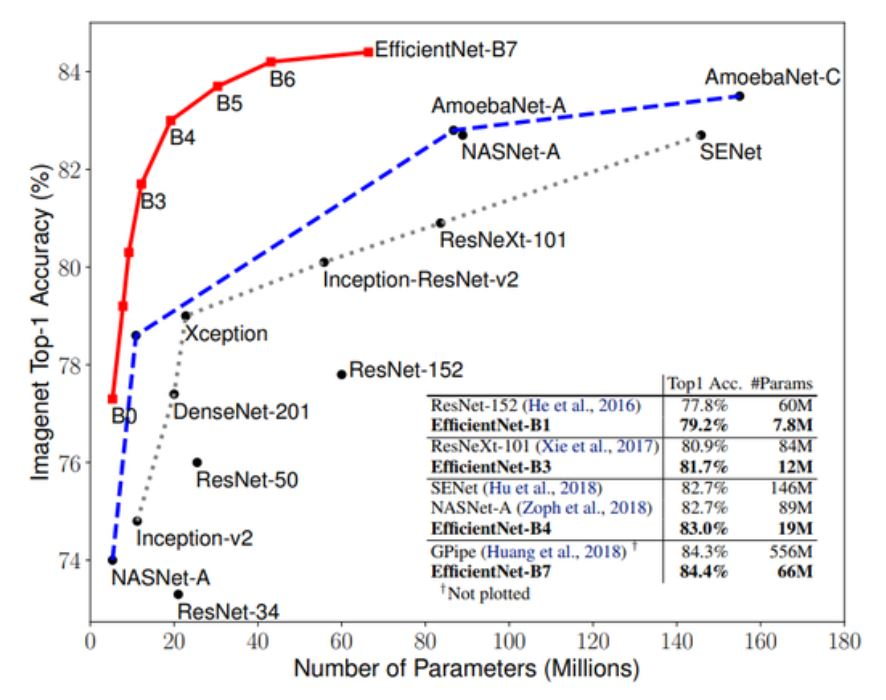

> 원문 - https://arxiv.org/abs/1905.11946

> 논문 리뷰 - https://hoya012.github.io/blog/EfficientNet-review/


- EfficientNet은 우리가 이미지에 주로 사용하는 CNN을 효율적으로 사용할 수 있도록 네트워크의 형태를 조정할 수 있는 width, depth, resolution 세 가지 요소에 집중.
- width는 CNN의 채널에 해당. (채널을 늘려줄 수록 CNN의 파라미터와 특성을 표현하는 차원의 크기를 키울 수 있다.)
- depth는 네트워크의 깊이
- resolution은 입력값의 너비(w)와 높이(h) 크기 (입력이 클수록 정보가 많아져 성능이 올라갈 여지가 생기지만, 레이어 사이의 특성 맵이 커지는 단점이 있음)

### Compound scaling



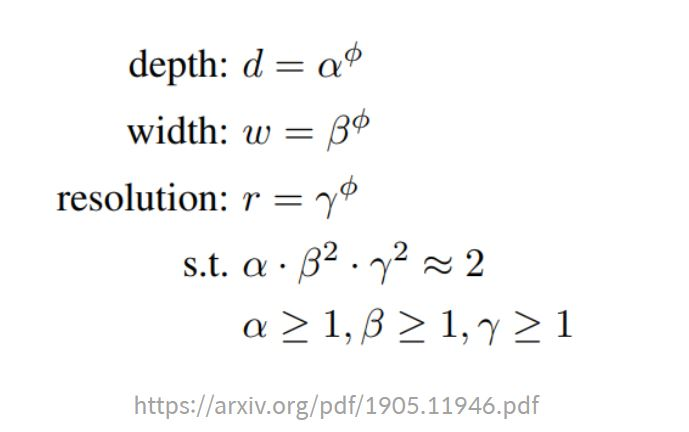

- 기본 모델(baseline network)의 구조를 미리 찾고 고정
- 개별 레이어의 resolution, depth, width를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화.

- 세 가지 "scaling factor"를 동시에 고려하는 compound scaling을 제안. => compound coefficient ϕ는 모델의 크기를 조정하기 위한 계수. 

- 고정된 계수를 조절하면 일정한 규칙에 따라(in a principled way) 모델의 구조가 조절되도록 할 수 있다.

> 논문은 우선 ϕ를 1로 고정한 뒤 resolution과 depth, width을 정하는 α,β,γ의 최적값을 찾습니다. 논문에서는 앞서 설명했던 그리드 탐색으로 α,β,γ을 찾을 수 있었다고 설명합니다. 이후 α,β,γ 즉 resolution과 depth, width의 기본 배율을 고정한 뒤 compound coefficient ϕ를 조정하여 모델의 크기를 조정합니다.

> 참고 : https://machinelearningmastery.com/applications-of-deep-learning-for-computer-vision/

- EfficientNet 논문 :https://arxiv.org/pdf/1905.11946.pdf